#Optimizing function 4: Adam

## Conjunto de datos

This is a data set of 11,228 Reuters news stories, tagged into 46 topics. There are 46 theme categories into which a story can be categorized into (so it's not a binary classification).

Each news item is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the data set, so that, for example, the integer "3" encodes the third most frequent word in the data. This allows quick filtering operations such as: "consider only the 10,000 most common words, but eliminate the 20 most common words." **Note:** Here, it has been used the same dataset as a previous example. For more insights on the dataset and the processing steps, please take a look at the following notbook that is in the same folder: *Text_classification(mini-Batch Gradient Descent).ipynb*

## Importing and visualizing dataset

In [ ]:
from tensorflow.keras.datasets import reuters

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
word_index = reuters.get_word_index()


550378/550378 [==============================] - 0s 0us/step


In [ ]:
print("Trainning data:", len(train_data))
print("Testing data:", len(test_data))

Trainning data: 8982
Testing data: 2246


In [ ]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
reversed_word_index = {v: k for k, v in word_index.items()}
' '.join([reversed_word_index.get(i - 3, '(' + str(i) + ')') for i in train_data[0]])

In [ ]:
train_labels

## Preprocessing

In [ ]:
import numpy as np

def vectorize(seqs, dim=10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1.
    return results

In [ ]:
X_train = vectorize(train_data, 10000)
X_test = vectorize(test_data, 10000)

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

In [ ]:
train_labels[0]

3

In [ ]:
Y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)

## Neural network construction

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
from tensorflow.keras import optimizers

opt_func = optimizers.Adam()

In [ ]:
model.compile(
    optimizer=opt_func,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [ ]:
len(X_train) / 32

280.6875

In [ ]:
history = model.fit(
    X_train,
    Y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, Y_val))

Epoch 1/30
281/281 [==============================] - 25s 84ms/step - loss: 1.1216 - accuracy: 0.7595 - precision: 0.8862 - val_loss: 0.8115 - val_accuracy: 0.8068 - val_precision: 0.8810
Epoch 2/30
281/281 [==============================] - 23s 83ms/step - loss: 0.3350 - accuracy: 0.9241 - precision: 0.9391 - val_loss: 0.8387 - val_accuracy: 0.8094 - val_precision: 0.8627
Epoch 3/30
281/281 [==============================] - 24s 85ms/step - loss: 0.2382 - accuracy: 0.9441 - precision: 0.9477 - val_loss: 0.8728 - val_accuracy: 0.8005 - val_precision: 0.8459
Epoch 4/30
281/281 [==============================] - 23s 82ms/step - loss: 0.1949 - accuracy: 0.9493 - precision: 0.9518 - val_loss: 0.8908 - val_accuracy: 0.8032 - val_precision: 0.8408
Epoch 5/30
281/281 [==============================] - 23s 83ms/step - loss: 0.1728 - accuracy: 0.9501 - precision: 0.9510 - val_loss: 0.8700 - val_accuracy: 0.8094 - val_precision: 0.8500
Epoch 6/30
281/281 [==============================] - 22s 78

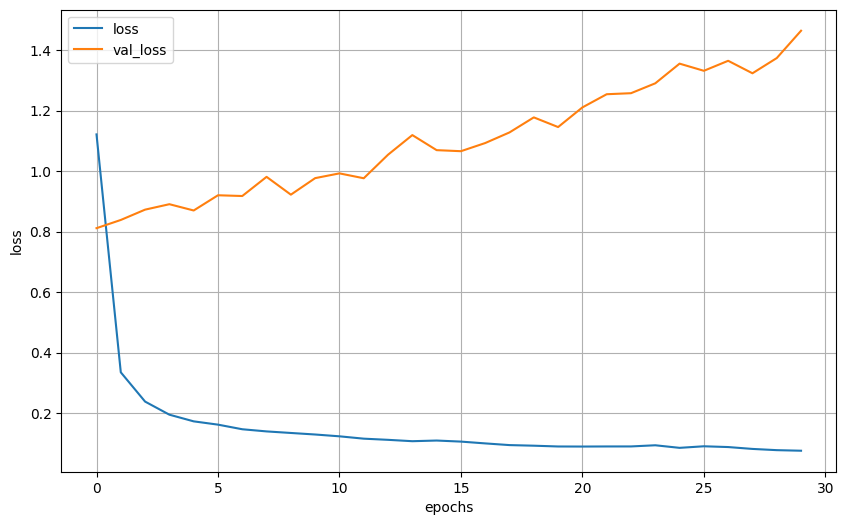

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

Overfitting is produced. From the begining the error from the validation set raises. We are doing a lot of optimization of the parameters per epoch and it is an algorithm that quickly finds the  optimal solution so it ends up overfitting (since the first epoch). If we increase the mini-batch size we will reduce the overfitting.

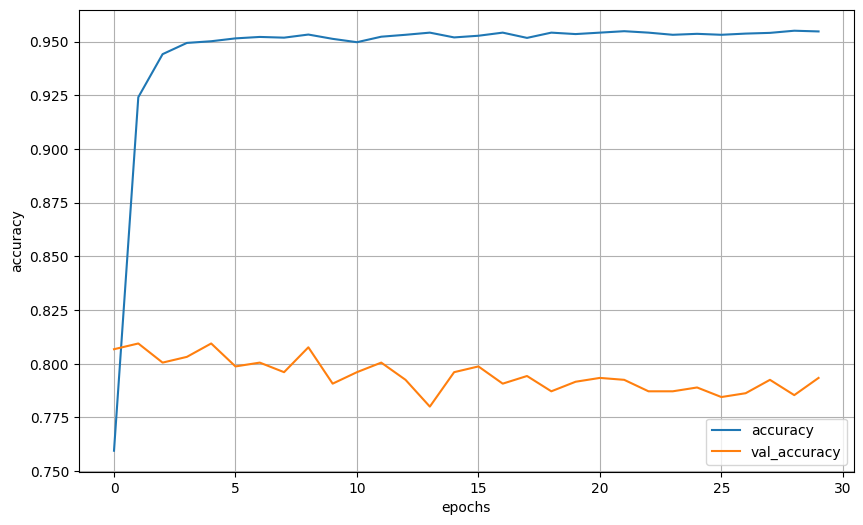

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

### Prediction with the test set

In [ ]:
error, accuracy, precision = model.evaluate(X_test, Y_test)

36/36 [==============================] - 0s 11ms/step - loss: 1.6525 - accuracy: 0.7934 - precision: 0.8184


In [ ]:
print("Error: ", error)
print("Accuracy: ", accuracy)
print("Precision: ", precision)

Error:  1.6524670124053955
Accuracy:  0.7934104800224304
Precision:  0.8183520436286926
